# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
# full import 
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
df = pd.read_csv("data/raw/Bank_data.csv", index_col=0)
df["y"] = df["y"].map({"yes": 1, "no": 0})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interest_rate  518 non-null    float64
 1   credit         518 non-null    float64
 2   march          518 non-null    float64
 3   may            518 non-null    float64
 4   previous       518 non-null    float64
 5   duration       518 non-null    float64
 6   y              518 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 32.4 KB


In [5]:
df.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
y = df.y
x1 = df.duration

### Simple Logistic Regression

Run the regression.

In [7]:
X = sm.add_constant(x1)
results = sm.Logit(y, X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                  0.2121
Time:                        20:34:19   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

<Axes: xlabel='duration', ylabel='y'>

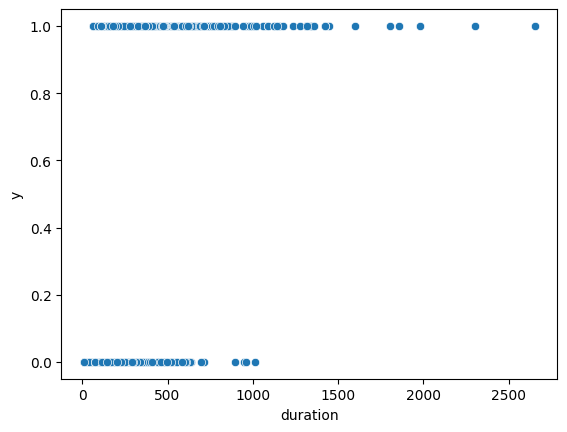

In [8]:
sns.scatterplot(df, x="duration", y="y")

### Find the odds of duration

In [10]:
odds = np.exp(results.params["duration"])
odds

np.float64(1.0051253082618845)